In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import joblib

In [2]:
players = pd.read_csv(
          'players_22.csv',
          usecols=['overall', 'potential', 'age', 'height_cm', 'weight_kg', 'nationality_id', 'international_reputation', 'pace',	'shooting',	'passing', 'dribbling',	'defending',	'physic',	'attacking_crossing', 'wage_eur']
)

In [3]:
players.head()

,overall,potential,wage_eur,age,height_cm,weight_kg,nationality_id,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing
0,93,93,320000.0,34,170,72,52,5,85.0,92.0,91.0,95.0,34.0,65.0,85
1,92,92,270000.0,32,185,81,37,5,78.0,92.0,79.0,86.0,44.0,82.0,71
2,91,91,270000.0,36,187,83,38,5,87.0,94.0,80.0,88.0,34.0,75.0,87
3,91,91,270000.0,29,175,68,54,5,91.0,83.0,86.0,94.0,37.0,63.0,85
4,91,91,350000.0,30,181,70,7,4,76.0,86.0,93.0,88.0,64.0,78.0,94


In [4]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   overall                   19239 non-null  int64  
 1   potential                 19239 non-null  int64  
 2   wage_eur                  19178 non-null  float64
 3   age                       19239 non-null  int64  
 4   height_cm                 19239 non-null  int64  
 5   weight_kg                 19239 non-null  int64  
 6   nationality_id            19239 non-null  int64  
 7   international_reputation  19239 non-null  int64  
 8   pace                      17107 non-null  float64
 9   shooting                  17107 non-null  float64
 10  passing                   17107 non-null  float64
 11  dribbling                 17107 non-null  float64
 12  defending                 17107 non-null  float64
 13  physic                    17107 non-null  float64
 14  attack

In [5]:
players.dropna(inplace=True)

In [6]:
players.reset_index(inplace=True, drop=True)

In [7]:
players.head()

,overall,potential,wage_eur,age,height_cm,weight_kg,nationality_id,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing
0,93,93,320000.0,34,170,72,52,5,85.0,92.0,91.0,95.0,34.0,65.0,85
1,92,92,270000.0,32,185,81,37,5,78.0,92.0,79.0,86.0,44.0,82.0,71
2,91,91,270000.0,36,187,83,38,5,87.0,94.0,80.0,88.0,34.0,75.0,87
3,91,91,270000.0,29,175,68,54,5,91.0,83.0,86.0,94.0,37.0,63.0,85
4,91,91,350000.0,30,181,70,7,4,76.0,86.0,93.0,88.0,64.0,78.0,94


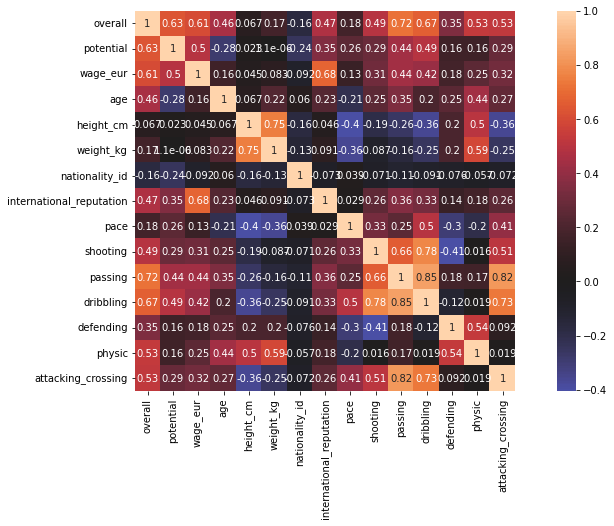

In [8]:
fig = plt.figure(figsize=(15, 7))
sns.heatmap(players.corr(), center=0, square=True, annot=True)

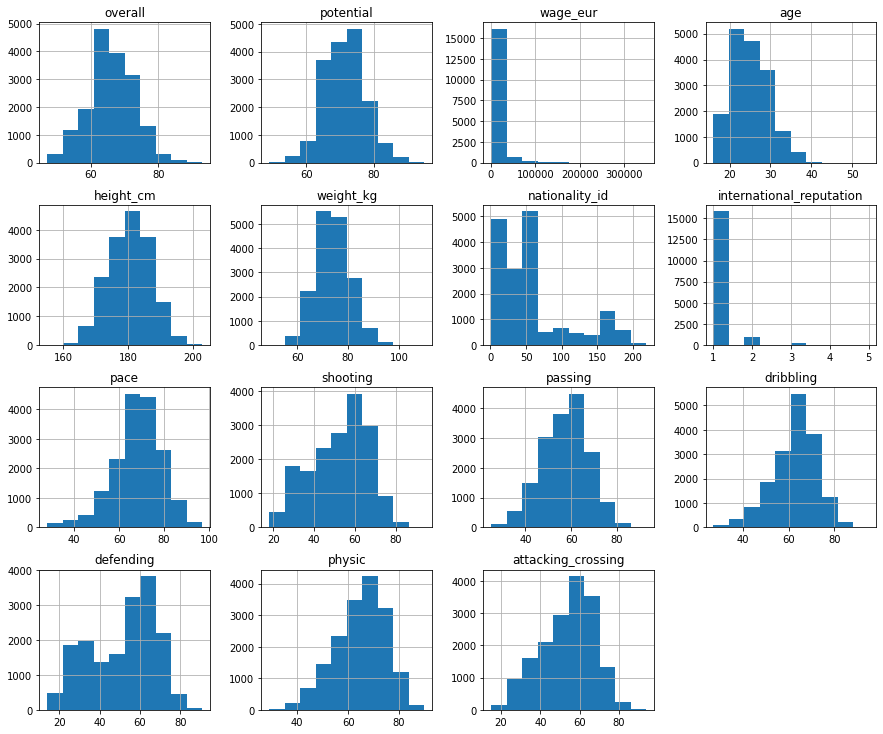

In [9]:
players.hist(layout=(5,4), figsize=(15,16))

plt.show()

In [10]:
sp = players[['overall', 'potential', 'passing', 'dribbling', 'wage_eur']]
sp.head()

,overall,potential,passing,dribbling,wage_eur
0,93,93,91.0,95.0,320000.0
1,92,92,79.0,86.0,270000.0
2,91,91,80.0,88.0,270000.0
3,91,91,86.0,94.0,270000.0
4,91,91,93.0,88.0,350000.0


In [11]:
X = sp.drop('wage_eur', axis=1)
y = sp.wage_eur

In [12]:
standardScale = StandardScaler()
standardScale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [13]:
X_train.shape, y_train.shape

((13643, 4), (13643,))

In [14]:
X_test.shape, y_test.shape

((3411, 4), (3411,))

In [15]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [16]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [17]:
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

Mean Squared error of training set :240722726.198236
Mean Squared error of testing set :242648640.481415


In [18]:
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

R2 Score of training set:0.39
R2 Score of testing set:0.40


In [19]:
svr = SVR(kernel = 'linear')
svr.fit(X_train, y_train)
svr.fit(X_test, y_test)

SVR(kernel='linear')

In [20]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

svr.score(X_train, y_train)

0.20100429662318742

In [21]:
svr.score(X_test, y_test)

0.2025170691222955

In [22]:
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)

In [23]:
regr.fit(X_train, y_train)
regr.fit(X_test, y_test)

RandomForestRegressor(max_depth=2, random_state=0)

In [24]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

regr.score(X_train, y_train)

0.7014280241441286

In [25]:
regr.score(X_test, y_test)

0.7621240510179026

In [26]:
joblib.dump(regr, "pred151222.pkl")

['pred151222.pkl']